# Explore Calibrated Data

In [1]:
import ctapipe
from ctapipe.utils.datasets import get_dataset_path
from ctapipe.io import event_source, EventSeeker
from ctapipe.visualization import CameraDisplay
from ctapipe.instrument import CameraGeometry
from matplotlib import pyplot as plt
from astropy import units as u
import numpy as np
%matplotlib inline
plt.style.use("ggplot")

In [2]:
print(ctapipe.__version__)
print(ctapipe.__file__)

unknown
/home/travis/build/cta-observatory/ctapipe/ctapipe/__init__.py


Let's first open a raw event file and get an event out of it:

In [3]:
filename = get_dataset_path("gamma_test_large.simtel.gz")
source = event_source(filename, max_events=2)

for event in source:
    print(event.r0.event_id)

23703
31007


In [4]:
filename

'/home/travis/virtualenv/python3.8.0/lib/python3.8/site-packages/ctapipe_resources/gamma_test_large.simtel.gz'

In [5]:
source

allowed_tels,set(),"list of allowed tel_ids, others will be ignored. If left empty, all telescopes in the input stream will be included (default: traitlets.Undefined)"
back_seekable,False,Require the event source to be backwards seekable. This will reduce in slower read speed for gzipped files and is not possible for zstd compressed files (default: False)
input_url,/home/travis/virtualenv/python3.8.0/lib/python3.8/site-packages/ctapipe_resources/gamma_test_large.simtel.gz,Path to the input file containing events. (default: )
max_events,2,Maximum number of events that will be read from the file (default: None)
skip_calibration_events,True,Skip calibration events (default: True)


In [6]:
event

ctapipe.containers.EventAndMonDataContainer:
                    event_type: Event type
                       index.*: event indexing information
                          r0.*: Raw Data
                          r1.*: R1 Calibrated Data
                         dl0.*: DL0 Data Volume Reduced Data
                         dl1.*: DL1 Calibrated image
                         dl2.*: Reconstructed Shower Information
                          mc.*: Monte-Carlo data
                    mcheader.*: Monte-Carlo run header data
                        trig.*: central trigger information
                         count: number of events processed
                        inst.*: instrumental information
                   pointing[*]: Telescope pointing positions
                 calibration.*: Container for calibration coefficients for the
                                current event
                         mon.*: container for monitoring data (MON)

In [7]:
print(event.r1)

{'event_id': 31007,
 'obs_id': 7514,
 'tel': {7: {'selected_gain_channel': array([0, 0, 0, ..., 0, 0, 0], dtype=int8),
             'trigger_time': None,
             'trigger_type': 0,
             'waveform': array([[ 0.10689101, -0.12713137, -0.34443787, ...,  0.24061808,
         0.09017512,  0.04002747],
       [-0.49408302, -0.42532185, -0.5456539 , ..., -0.1330869 ,
         0.03881599,  0.09038687],
       [-0.0561102 ,  0.04327327,  0.2089124 , ...,  0.6230102 ,
         0.4408072 ,  0.12609284],
       ...,
       [-0.20328829, -0.1871532 , -0.17101811, ..., -0.52599   ,
        -0.13874795,  0.21622398],
       [-0.83460796, -0.6333162 , -0.19718406, ..., -0.5326703 ,
        -0.5494446 , -0.7507364 ],
       [-0.4828831 , -0.38903782, -0.10750204, ..., -0.15442467,
        -0.35775608, -0.5454466 ]], dtype=float32)},
         13: {'selected_gain_channel': array([0, 0, 0, ..., 0, 0, 0], dtype=int8),
              'trigger_time': None,
              'trigger_type': 0,
       

## Perform basic calibration:

Here we will use a `CameraCalibrator` which is just a simple wrapper that runs the three calibraraton and trace-integration phases of the pipeline, taking the data from levels:

  **R0** &rightarrow; **R1** &rightarrow; **DL0** &rightarrow; **DL1**

You could of course do these each separately, by using the classes `R1Calibrator`, `DL0Reducer`, and `DL1Calibrator`.
Note that we have not specified any configuration to the `CameraCalibrator`, so it will be using the default algorithms and thresholds, other than specifying that the product is a "HESSIOR1Calibrator" (hopefully in the near future that will be automatic).

In [8]:
from ctapipe.calib import CameraCalibrator

calib = CameraCalibrator(subarray=source.subarray)
calib(event)

Now the *r1*, *dl0* and *dl1* containers are filled in the event

* **r1.tel[x]**: contains the "r1-calibrated" waveforms, after gain-selection, pedestal subtraciton, and gain-correction
* **dl0.tel[x]**: is the same but with optional data volume reduction (some pixels not filled), in this case this is not performed by default, so it is the same as r1
* **dl1.tel[x]**: contains the (possibly re-calibrated) waveforms as dl0, but also the time-integrated *image* that has been calculated using a `ImageExtractor` (a `NeighborPeakWindowSum` by default)

In [9]:
for tel_id in event.dl1.tel:
    print("TEL{:03}: {}".format(tel_id, event.inst.subarray.tel[tel_id]))
    print("  - r0  wave shape  : {}".format(event.r0.tel[tel_id].waveform.shape))
    print("  - r1  wave shape  : {}".format(event.r1.tel[tel_id].waveform.shape))
    print("  - dl1 image shape : {}".format(event.dl1.tel[tel_id].image.shape))

TEL007: MST_MST_FlashCam
  - r0  wave shape  : (1, 1764, 25)
  - r1  wave shape  : (1764, 25)
  - dl1 image shape : (1764,)
TEL013: MST_MST_FlashCam
  - r0  wave shape  : (1, 1764, 25)
  - r1  wave shape  : (1764, 25)
  - dl1 image shape : (1764,)
TEL016: MST_MST_FlashCam
  - r0  wave shape  : (1, 1764, 25)
  - r1  wave shape  : (1764, 25)
  - dl1 image shape : (1764,)
TEL019: MST_MST_FlashCam
  - r0  wave shape  : (1, 1764, 25)
  - r1  wave shape  : (1764, 25)
  - dl1 image shape : (1764,)
TEL025: MST_MST_FlashCam
  - r0  wave shape  : (1, 1764, 25)
  - r1  wave shape  : (1764, 25)
  - dl1 image shape : (1764,)
TEL028: MST_MST_FlashCam
  - r0  wave shape  : (1, 1764, 25)
  - r1  wave shape  : (1764, 25)
  - dl1 image shape : (1764,)
TEL034: SST_ASTRI_ASTRICam
  - r0  wave shape  : (2, 2368, 1)
  - r1  wave shape  : (2368, 1)
  - dl1 image shape : (2368,)
TEL036: SST_ASTRI_ASTRICam
  - r0  wave shape  : (2, 2368, 1)
  - r1  wave shape  : (2368, 1)
  - dl1 image shape : (2368,)
TEL042: 

## Some image processing:

Let's look at the image

In [10]:
from ctapipe.visualization import CameraDisplay
tel_id = sorted(event.r1.tels_with_data)[1]
sub = event.inst.subarray
geometry = sub.tel[tel_id].camera.geometry
image = event.dl1.tel[tel_id].image

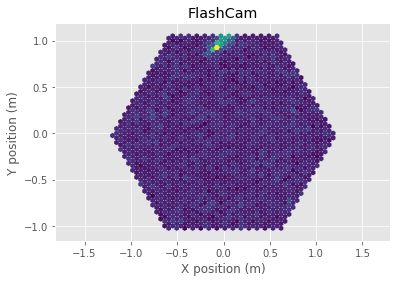

In [11]:
disp = CameraDisplay(geometry, image=image)

In [12]:
from ctapipe.image import tailcuts_clean, hillas_parameters

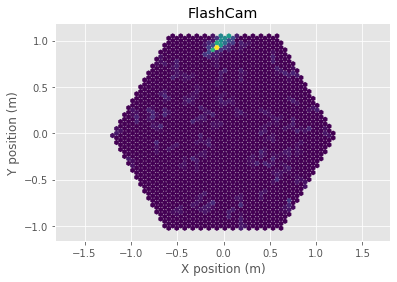

In [13]:
mask = tailcuts_clean(geometry, image, picture_thresh=10, boundary_thresh=5, min_number_picture_neighbors=2)
cleaned = image.copy()
cleaned[~mask] = 0
disp = CameraDisplay(geometry, image=cleaned)


In [14]:
params = hillas_parameters(geometry, cleaned)
print(params)
params

{'intensity': 6924.33507302263,
 'kurtosis': 2.0117571414683053,
 'length': <Quantity 0.62060765 m>,
 'phi': <Angle 1.53222079 rad>,
 'psi': <Angle -1.34445127 rad>,
 'r': <Quantity 0.35684904 m>,
 'skewness': 0.5818667067932448,
 'width': <Quantity 0.43406133 m>,
 'x': <Quantity 0.01376223 m>,
 'y': <Quantity 0.35658357 m>}


ctapipe.containers.HillasParametersContainer:
                     intensity: total intensity (size)
                             x: centroid x coordinate
                             y: centroid x coordinate
                             r: radial coordinate of centroid
                           phi: polar coordinate of centroid [deg]
                        length: standard deviation along the major-axis
                         width: standard spread along the minor-axis
                           psi: rotation angle of ellipse [deg]
                      skewness: measure of the asymmetry
                      kurtosis: measure of the tailedness

(-0.1434164321719706, 0.8565835678280294)

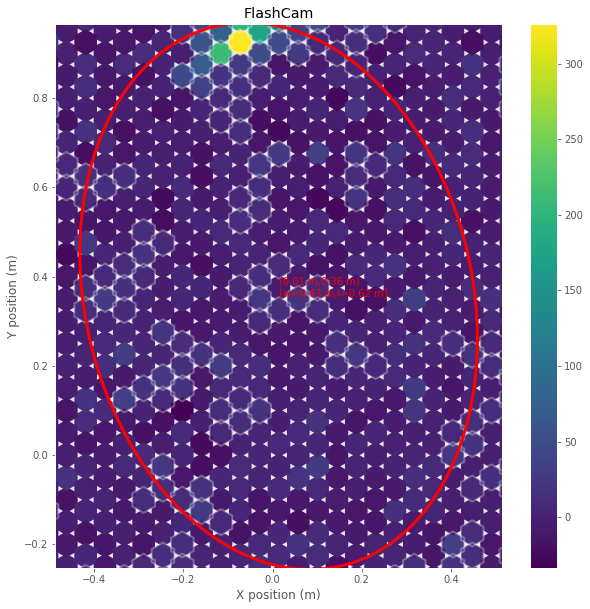

In [15]:
params = hillas_parameters(geometry, cleaned)

plt.figure(figsize=(10,10))
disp = CameraDisplay(geometry, image=image)
disp.add_colorbar()
disp.overlay_moments(params, color='red', lw=3)
disp.highlight_pixels(mask, color='white', alpha=0.3, linewidth=2)

plt.xlim(params.x.to_value(u.m) - 0.5, params.x.to_value(u.m) + 0.5)
plt.ylim(params.y.to_value(u.m) - 0.5, params.y.to_value(u.m) + 0.5)

In [16]:
source.metadata

{'is_simulation': True}

## More complex image processing:

Let's now explore how stereo reconstruction works. 

### first, look at a summed image from multiple telescopes

For this, we want to use a `CameraDisplay` again, but since we can't sum and display images with different cameras, we'll just sub-select images from a particular camera type

These are the telescopes that are in this event:

In [17]:
tels_in_event = set(event.dl1.tel.keys())  # use a set here, so we can intersect it later
tels_in_event

{7, 13, 16, 19, 25, 28, 34, 36, 42}

In [18]:
cam_ids = set(sub.get_tel_ids_for_type("MST_MST_FlashCam"))

In [19]:
cams_in_event = tels_in_event.intersection(cam_ids)
first_tel_id = list(cams_in_event)[0]
tel = sub.tel[first_tel_id]
print("{}s in event: {}".format(tel, cams_in_event))

MST_MST_FlashCams in event: {7, 13, 16, 19, 25, 28}


Now, let's sum those images:

In [20]:
image_sum = np.zeros_like(tel.camera.geometry.pix_x.value)  # just make an array of 0's in the same shape as the camera 

for tel_id in cams_in_event:
    image_sum += event.dl1.tel[tel_id].image

And finally display the sum of those images

Text(0.5, 1.0, 'Sum of 6x MST_MST_FlashCam')

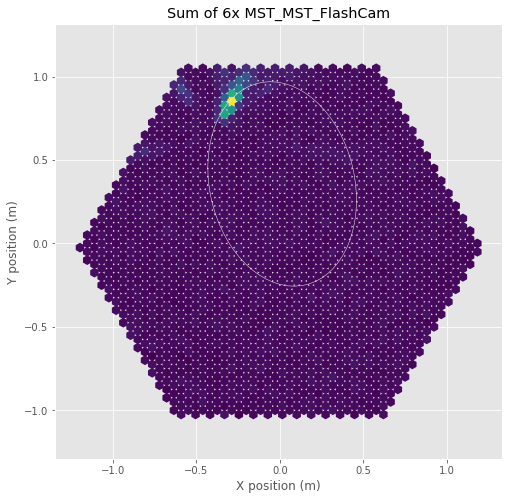

In [21]:
plt.figure(figsize=(8,8))

disp = CameraDisplay(tel.camera.geometry, image=image_sum)
disp.overlay_moments(params, with_label=False)
plt.title("Sum of {}x {}".format(len(cams_in_event), tel))

let's also show which telescopes those were. Note that currently ArrayDisplay's value field is a vector by `tel_index`, not `tel_id`, so we have to convert to a tel_index. (this may change in a future version to be more user-friendly)


In [22]:
from ctapipe.visualization import ArrayDisplay

<Figure size 432x288 with 0 Axes>

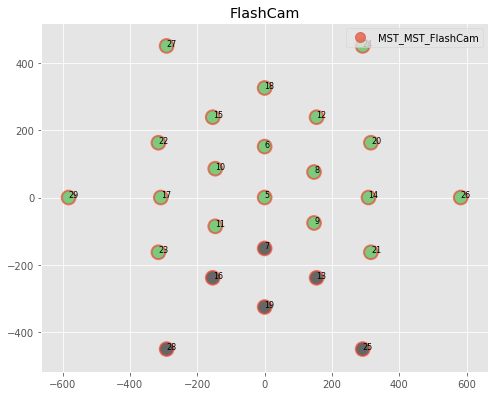

In [23]:
nectarcam_subarray = sub.select_subarray("FlashCam", cam_ids)

hit_pattern = np.zeros(shape=nectarcam_subarray.num_tels)
hit_pattern[[nectarcam_subarray.tel_indices[x] for x in cams_in_event ]] = 100

plt.set_cmap(plt.cm.Accent)
plt.figure(figsize=(8,8))

ad = ArrayDisplay(nectarcam_subarray)
ad.values = hit_pattern
ad.add_labels()
